In [149]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [150]:
all_ratings = pd.read_csv('data/all_ratings.csv')
ratings_single_account = pd.read_csv('data/ratings_single_account.csv')

In [151]:
all_ratings.head()

,rating_id,userId,movieId,rating,rating_date
0,1,1,307,3.5,2009-10-27 09:00:21
1,2,1,481,3.5,2009-10-27 09:04:16
2,3,1,1091,1.5,2009-10-27 09:04:31
3,4,1,1257,4.5,2009-10-27 09:04:20
4,5,1,1449,4.5,2009-10-27 09:01:04


In [152]:
len(all_ratings)

27753444

In [153]:
ratings_single_account.head()

,rating_id,userId,movieId,rating,rating_date
0,19834829,202382,1,5.0,1997-05-20 06:50:22
1,25102792,256349,1,5.0,2017-08-24 03:49:46
2,15849334,161826,1,3.0,2016-12-17 15:13:43
3,21184239,216433,1,5.0,2015-11-19 04:07:21
4,4464337,45860,1,5.0,2001-11-24 12:06:59


In [154]:
len(ratings_single_account)

5620

In [155]:
def return_list_of_binned_ratings(list_of_ratings, ratings):
    ratings_for_movie_binned_lst = len(list_of_ratings) * [0]
    
    for rating in ratings:
        index = list_of_ratings.index(rating)
        ratings_for_movie_binned_lst[index] += 1

    return dict(zip(list_of_ratings,ratings_for_movie_binned_lst))

In [156]:
common = all_ratings.merge(ratings_single_account,on=['rating_id'])
ratings_without_single_account = all_ratings[~all_ratings.rating_id.isin(common.rating_id)]
print(f'Die Zahl der Beiden listen Zusammenaddiert: {len(ratings_without_single_account) + len(ratings_single_account)} sollte mit der Zahl der ganzen Liste {len(all_ratings)} übereinstimmen')
ratings_without_single_account.head()

Die Zahl der Beiden listen Zusammenaddiert: 27753444 sollte mit der Zahl der ganzen Liste 27753444 übereinstimmen


,rating_id,userId,movieId,rating,rating_date
0,1,1,307,3.5,2009-10-27 09:00:21
1,2,1,481,3.5,2009-10-27 09:04:16
2,3,1,1091,1.5,2009-10-27 09:04:31
3,4,1,1257,4.5,2009-10-27 09:04:20
4,5,1,1449,4.5,2009-10-27 09:01:04


In [157]:
list_of_ratings = [5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5]  
list_of_ratings = list_of_ratings[::-1]

binned_ratings_single_account = return_list_of_binned_ratings(list_of_ratings, ratings_single_account['rating'])
binned_ratings_without_single_accounts = return_list_of_binned_ratings(list_of_ratings, ratings_without_single_account['rating'])

In [196]:
list_of_ratings = [5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5]  
list_of_ratings = list_of_ratings[::-1]
list_of_ratings

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [158]:
print(binned_ratings_single_account)
print(binned_ratings_without_single_accounts)

{0.5: 164, 1.0: 194, 1.5: 84, 2.0: 255, 2.5: 175, 3.0: 714, 3.5: 442, 4.0: 1284, 4.5: 495, 5.0: 1813}
{0.5: 442224, 1.0: 886039, 1.5: 441270, 2.0: 1850372, 2.5: 1373244, 3.0: 5514954, 3.5: 3403918, 4.0: 7393426, 4.5: 2373055, 5.0: 4069322}


In [159]:
binned_ratings_single_account_percentage = {k: v / len(ratings_single_account) for k, v in binned_ratings_single_account.items()}
binned_ratings_without_single_accounts_percentage = {k: v / len(ratings_without_single_account) for k, v in binned_ratings_without_single_accounts.items()}

In [160]:
print(binned_ratings_single_account_percentage)
print(binned_ratings_without_single_accounts_percentage)

{0.5: 0.029181494661921707, 1.0: 0.03451957295373666, 1.5: 0.01494661921708185, 2.0: 0.045373665480427046, 2.5: 0.03113879003558719, 3.0: 0.12704626334519573, 3.5: 0.07864768683274022, 4.0: 0.22846975088967972, 4.5: 0.08807829181494661, 5.0: 0.3225978647686833}
{0.5: 0.015937249710103393, 1.0: 0.03193183724965244, 1.5: 0.015902868635753204, 2.0: 0.06668530116091266, 2.5: 0.04949015101148112, 3.0: 0.19875266615501094, 3.5: 0.12267333106913177, 4.0: 0.2664506593381881, 4.5: 0.0855222016688588, 5.0: 0.14665373400090762}


In [161]:
def calcuate_position_outside_annotations(dict_of_stacked_elements, list_of_ratings, threshold):
    sum = 0
    dict_position_to_small_ratings = {}
    for rating in list_of_ratings:
        if dict_of_stacked_elements[rating] >= threshold:
            sum += dict_of_stacked_elements[rating]
        else:
            dict_position_to_small_ratings[rating] = sum + (dict_of_stacked_elements[rating] / 2)
            sum += dict_of_stacked_elements[rating]

    return dict_position_to_small_ratings

In [162]:
binned_ratings_single_account_percentage

{0.5: 0.029181494661921707,
 1.0: 0.03451957295373666,
 1.5: 0.01494661921708185,
 2.0: 0.045373665480427046,
 2.5: 0.03113879003558719,
 3.0: 0.12704626334519573,
 3.5: 0.07864768683274022,
 4.0: 0.22846975088967972,
 4.5: 0.08807829181494661,
 5.0: 0.3225978647686833}

In [163]:
csv_file_ratings_single_account = pd.DataFrame.from_dict(binned_ratings_single_account_percentage.copy(), orient='index', columns=['value']).reset_index().rename(columns={"index": "score"}).to_csv('data/data_visualizations/horizontal_stacked_barchart_single_rating.csv', index=False)
csv_file_ratings_without_single_account = pd.DataFrame.from_dict(binned_ratings_without_single_accounts_percentage.copy(), orient='index', columns=['value']).reset_index().rename(columns={"index": "score"}).to_csv('data/data_visualizations/horizontal_stacked_barchart_multi_rating.csv', index=False)

In [192]:
binned_ratings_single_account_percentage = pd.read_csv('data/data_visualizations/horizontal_stacked_barchart_single_rating.csv').to_dict()
binned_ratings_without_single_accounts_percentage = pd.read_csv('data/data_visualizations/horizontal_stacked_barchart_multi_rating.csv').to_dict()

In [193]:
binned_ratings_single_account_percentage = dict(zip(list(binned_ratings_single_account_percentage['score'].values()), list(binned_ratings_single_account_percentage['value'].values())))
binned_ratings_without_single_accounts_percentage = dict(zip(list(binned_ratings_without_single_accounts_percentage['score'].values()), list(binned_ratings_without_single_accounts_percentage['value'].values())))

In [194]:
def create_stacked_barchart_subplot(figure, threshold, description, list_with_content, position_x, position_y, colors, list_of_ratings, text_over):
    if text_over:
        y_offset = 0.5
    else:
        y_offset = -0.5

    traces = []
    for i, rating in enumerate(list_of_ratings):
        text = 'inside' if list_with_content[rating] > threshold else 'none'

        trace = go.Bar(y=description,
                        x=[list_with_content[rating]],
                        name=f'{rating}',
                        showlegend=False,
                        orientation='h',
                        textangle=0,
                        marker_color=colors[i],
                        textposition=text,
                        text=rating,
                        insidetextanchor='middle',
                        hovertemplate='Percentage of score '+ str(rating) +': '+ str(round(list_with_content[rating] * 100, 2)) +'%' +
                        "<extra></extra>")
        traces.append(trace)

    position_to_small_content = calcuate_position_outside_annotations(list_with_content, list_of_ratings, threshold)

    for rating in position_to_small_content:
        figure.add_annotation(x=position_to_small_content[rating], y=y_offset,
                            text=rating,
                            showarrow=False,
                            xref=f'x{position_x}',
                            yref=f'y{position_y}')
    
    figure.add_traces(traces, position_y, position_x)

In [195]:
#Max threshold that makes sense
#threshold = 0.0312
threshold = 0.02
descripion_only_one_ratings = ['Score distribution from <br> Users with only one rating']
descriont_multiple_ratings = ['Score distribution from <br> Users with multiple ratings']
colors = px.colors.sequential.Viridis
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing = 0.00)
create_stacked_barchart_subplot(fig, threshold, descripion_only_one_ratings, binned_ratings_single_account_percentage, 1, 1, colors, list_of_ratings, True)
create_stacked_barchart_subplot(fig, threshold, descriont_multiple_ratings, binned_ratings_without_single_accounts_percentage, 1, 2, colors, list_of_ratings, False)

fig.update_layout(barmode='stack')
fig.update_layout(title={'text': "Comparison of rating score from users with only one ratign compared to score from users with multiple ratings"})
fig.update_xaxes(visible=False)
fig.update_layout(plot_bgcolor="#FFFFFF")
fig.show()

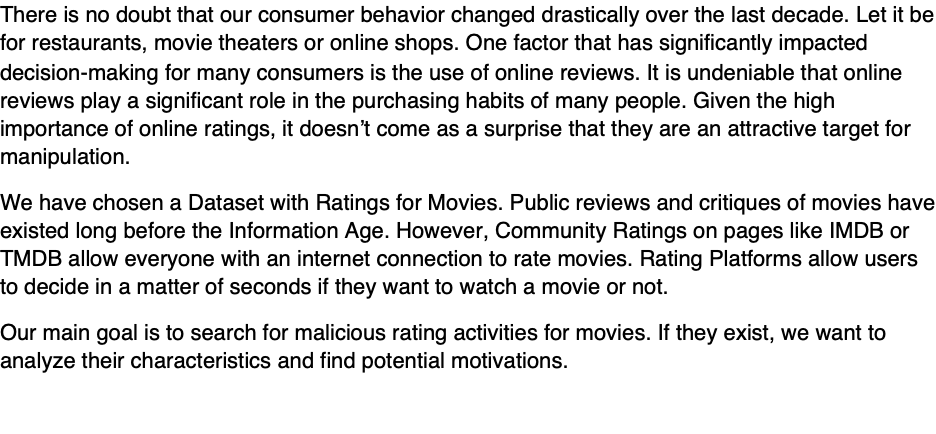

We used a dataset from the site movieLens to analyze suspicious non humanly generated activity, so-called bot activity in movie ratings.

The dataset contains all their movies, ratings and many more information. We focused us most on the rating data to find those bot activities. The rating data contains the user ID, the score of the rating, the timestamp of when the rating was submitted and which movie the rating belongs to. Each user of movieLens can rate a movie with a score between 0.5 and 5.0 in steps of 0.5 points. This means that each user can rate a movie between a range of 10 scores.

At first, we thought about our personal experience on social media. A lot of suspicious account on sites like Instagram have low activities. We thought it has to do with the detection of suspicious actives. If you have a lot of activity, it is easier to find patterns in the usage. Our guess was that the hosts of the websites already monitor the activity of each user and ban those suspicious users themselves.

With that logic, we created our first theory. Our theory was: "Users which rated only one movie are manly bots".

To prove this theory, our goal was to analyzed all the data of users with one rating.
At first, we filtered out all the ratings, which came from users with only one rating. We were surprised by the result. Of the over 27 Million ratings in total, only 5'620 of ratings came from users which only left one rating. This means in the worst case scenario, only 0.02% of the ratings on movieLens could potentially be from bot activity after our theory.
This result already made us skeptic and there were two options on why there were so few ratings from users with only one rating. Firstly, our theory turns out to be true, and the site could have a low amount of bots. This would mean that the bot activity on the site movieLens doesn't have a profound impact on the ratings, which would be a great conclusion. Secondly, it could mean that our theory was completely wrong and there is no correlation between accounts with only one rating and bot activity.
So the next step to prove or disprove our theory, we looked deeper into the data and compared the rating scores of the ratings from the users with one rating to the users with multiple ratings. We expected to find more ratings at both ends of the spectrum, and fewer ratings in the middle of the spectrum for ratings from users with only one rating. The reason behind that logic would be, that the incentive to create botted ratings would be to push the movie you have some kind of relation to up for your personal gain or to push other competing movies down to look better in comparison.
To compare those two metrics, we have decided to make a horizontal stacked bar chart for each class. On the x-axis there are the percentage of each rating group and on the y axes are the two categories "user with only one rating" and "user with multiple ratings".  This gives us an interesting insight into the data. 

We can clearly see that there is a strong deviation for the score 5.0 and 0.5. The probability of a 5.0 rating is more than double for the users with only one rating, then there is the probability of 5.0 rating for the users with multiple ratings. On the other end of the spectrum, the 0.5 ratings are less conclusive. The probability is nearly double for the ratings from users with one rating compared to the ratings from users with multiple ratings, but the probability for 0.5 ratings are in both cases low. But in both cases it is important to see that the dataset of the ratings from users with one rating was only 0.2% compared to users with multiple ratings, which are the other 99.8%. Because of that difference, the deviation in the ratings from users with only one account is not significant.

The previous graph definitively gave us interesting insights, but it wasn't conclusive enough to neither prove nor disprove our theory. Because of that, we took further investigation into the timeline of when those ratings were submitted. As we thought, botted ratings and manipulation is a more recent activity that maybe started 5 to 10 years ago. To get prove about our thought, we searched for  proof.  We looked into google trends, which collects data about how many searches in Google have the given search term. We have tried different terms and got the best data with the search term "fake rating". Obviously, this term is wide and is not limited to the website movieLens and is neither limited to movie ratings, but it was the narrowest term that had enough data to show a trend. The data from Google trends started at 2004, but the values before August 2010 are not conclusive enough because there are a lot of short term spikes in single months where the month before and after goes  to 0. We decided to show the trend in a bar chart grouped by years, so we took the year from 2011 to 2017 which is the last year the movieLens data ranges from the first day to the last of the year.
Grouping it by years, mitigates the variations which it has from the small size of the dataset.

In addition to the Google trends data, we looked into the growth of the ratings from users with only one rating. To reduce the complexity of the graph, we decided to plot the difference between the yearly growth in percentage of ratings from users with only one rating, subtracted by the yearly growth of all ratings.  

Looking at the first graph that compares the amount of ratings from users with only one rating, there is a clear correlation between the rise in 2015 of search traffic for the term "fake rating" and the growth of those ratings. These gave us a lot of hope, that we are on something. But the second graph that compares the growth of those ratings to all ratings tells a complete other story. 2015 was by far the worst year in growth of those ratings compared to all ratings. The ratings of users with only one rating, like shown on the left graph, grew that year, but all ratings outgrew them by over 150%. This means that the ration of all ratings to ratings from users with only rating declined in 2015 and 2016. 

To conclude our research, the theory: "Users which rated only one movie are manly bots" was disproven. We have looked into all metrics that were given to us and there were no significant deviation on patterns in the data, that proved our theory. The score was on average better but not in a significant way and all ratings from users with only one rating was only made 0.02% of all ratings. Furthermore, there was no significant growth over the year and the only outlier in our analysis was a decline of growth of those ratings compared to the growth of all ratings in 2015.
This means that there is no indication, that users with only one rating on the site movieLens are non humanly generated activity. 

After that analysis, we decided on building a new theory. Actually this theory was the complete opposite of the previous theory.